## Prediction_loan_eligibility

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Looking for data

In [2]:
train = pd.read_csv("Data/credit_train.csv")
test = pd.read_csv("Data/credit_test.csv")
train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [3]:
test.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0


In [4]:
train.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [5]:
test.columns

Index(['Loan ID', 'Customer ID', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

### Data prerpocessing

In [6]:
def pred(df):
    
    df = df[df['Loan ID'].isnull() == False]
    
    df['Term'] = df['Term'].replace(['Short Term', 'Long Term'],[0,1])
    
    df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].median())
    
    df['Annual Income'] = df['Annual Income'].fillna(df['Annual Income'].median())
    
    df['Years in current job'] = df['Years in current job'].replace(['8 years', '10+ years', '3 years', '5 years', '< 1 year',
       '2 years', '4 years', '9 years', '7 years', '1 year', '6 years'],[8, 10, 3, 5, 0, 2, 4, 9, 7, 1, 6])
    
    df['Years in current job'] = df['Years in current job'].fillna(df['Years in current job'].median())
    
    df['Home Ownership'] = df['Home Ownership'].replace(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], [2, 4, 1, 3])
    
    df['Purpose'] = df['Purpose'].replace(['Home Improvements', 'Debt Consolidation', 'Buy House', 'other',
       'Business Loan', 'Buy a Car', 'major_purchase', 'Take a Trip',
       'Other', 'small_business', 'Medical Bills', 'wedding', 'vacation',
       'Educational Expenses', 'moving', 'renewable_energy'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
    
    df['Months since last delinquent'] = df['Months since last delinquent'].fillna(df['Months since last delinquent'].median())
    
    df['Maximum Open Credit'] = df['Maximum Open Credit'].fillna(df['Maximum Open Credit'].median())
    
    df['Bankruptcies'] = df['Bankruptcies'].fillna(df['Bankruptcies'].median())
    
    df['Tax Liens'] = df['Tax Liens'].fillna(df['Tax Liens'].median())
    
    df = df.drop(['Loan ID', 'Customer ID'], axis =1)
    
    return df

In [7]:
X = pred(train)
Test = pred(test)

/home/vitalii/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/vitalii/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/vitalii/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [8]:
X['Loan Status'] = X['Loan Status'].replace(['Fully Paid', 'Charged Off'], [1 , 0])
X['Loan Status'] = X['Loan Status'].fillna(0)

In [9]:
correlations_data = X.corr()['Loan Status'].sort_values()
correlations_data

Credit Score                   -0.401875
Term                           -0.110637
Number of Open Accounts        -0.011949
Tax Liens                      -0.010223
Monthly Debt                   -0.007916
Number of Credit Problems      -0.002358
Purpose                        -0.000519
Years in current job            0.006374
Bankruptcies                    0.006607
Maximum Open Credit             0.008405
Current Credit Balance          0.009663
Months since last delinquent    0.010156
Years of Credit History         0.023705
Home Ownership                  0.028267
Annual Income                   0.052035
Current Loan Amount             0.194633
Loan Status                     1.000000
Name: Loan Status, dtype: float64

In [10]:
y = X['Loan Status']
y.unique()

array([1, 0])

In [11]:
X = X.drop(['Loan Status'], axis = 1)

### Visualization, data relationship

In [12]:
df = pd.concat([X, Test])

corr = df.corr()

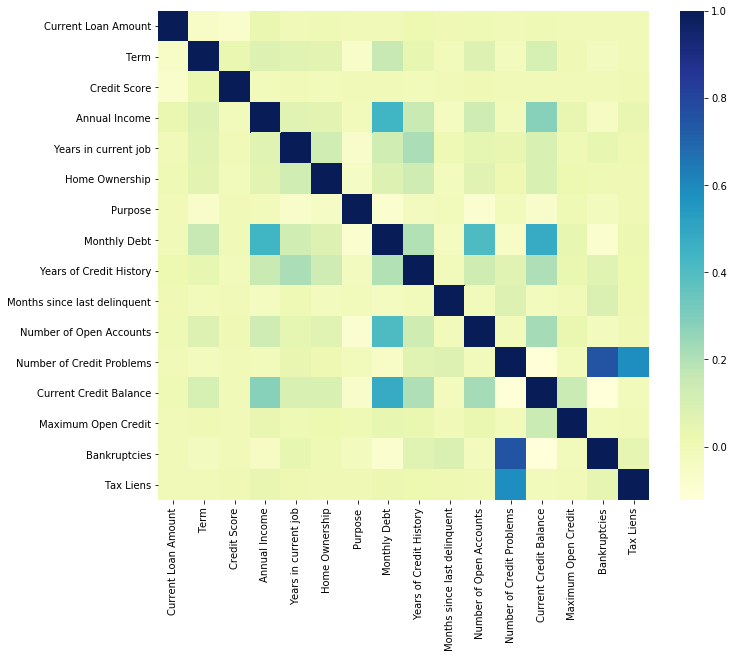

In [13]:
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, cmap="YlGnBu")

In [14]:
df['Bankruptcies'].unique()

array([1., 0., 2., 3., 5., 4., 7., 6.])

In [15]:
df['Number of Credit Problems'].unique()

array([ 1.,  0.,  2.,  5.,  4.,  3.,  7.,  6., 11., 15., 10.,  8.,  9.,
       12.])

### For the hypothesis testing, we define the following:

* **Null Hypothesis:** There is no relationship between Number of Credit Problems preference and the Bankruptcies
* **Alternate Hypothesis:** There is a relationship  between Number of Credit Problems preference and the Bankruptcies.

We will assume our significance level, $\alpha$ to be 0.05.

In [16]:
observed = df.pivot_table('Current Loan Amount', ['Bankruptcies'], 'Number of Credit Problems').reset_index()
#del observed.columns.name
observed = observed.set_index('Bankruptcies')
observed = observed.fillna(0)
observed

Number of Credit Problems,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,15.0
Bankruptcies,,,,,,,,,,,,,,
0.0,1.178541e+07,1.114418e+07,1.045535e+07,1.335605e+07,1.154813e+07,1.139157e+07,20173430.2,1.702005e+07,492624.0,25310711.25,314600.0,323796.0,0.0,447392.0
1.0,0.000000e+00,1.157942e+07,1.033625e+07,1.116061e+07,2.797097e+07,6.114793e+06,232441.0,0.000000e+00,0.0,180290.00,166364.0,0.0,0.0,0.0
2.0,0.000000e+00,0.000000e+00,1.316343e+07,1.195164e+07,2.166171e+07,3.247787e+05,543906.0,0.000000e+00,0.0,0.00,304216.0,0.0,0.0,0.0
3.0,0.000000e+00,0.000000e+00,0.000000e+00,1.178604e+07,1.020773e+07,2.133780e+05,0.0,1.724360e+05,0.0,0.00,0.0,0.0,0.0,0.0
4.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.810554e+06,5.013431e+07,0.0,0.000000e+00,50033813.5,0.00,0.0,0.0,442024.0,0.0
5.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.247546e+05,298760.0,0.000000e+00,0.0,0.00,0.0,0.0,0.0,0.0
6.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,198968.0,0.000000e+00,0.0,0.00,0.0,0.0,0.0,0.0
7.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2.219140e+05,0.0,0.00,0.0,0.0,0.0,0.0


In [17]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [18]:
chi2

509221770.2402005

In [19]:
p

0.0

The p-value we receive is less than the value level we selected. Therefore 
we reject the null hypothesis and accept the negative changed hypothesis. 


## Chosing model

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)

/home/vitalii/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


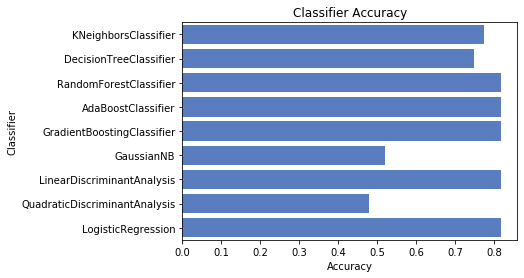

In [22]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()
]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

acc_dict = {}

for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
        
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf]
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns = log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x = 'Accuracy', y = 'Classifier', data = log, color = "b")

In [23]:
acc_dict

{'KNeighborsClassifier': 0.7748666666666667,
 'DecisionTreeClassifier': 0.7494333333333333,
 'RandomForestClassifier': 0.8189,
 'AdaBoostClassifier': 0.8192,
 'GradientBoostingClassifier': 0.8192,
 'GaussianNB': 0.5209,
 'LinearDiscriminantAnalysis': 0.8191333333333334,
 'QuadraticDiscriminantAnalysis': 0.4802,
 'LogisticRegression': 0.8191333333333334}

#### Best model

In [32]:
from sklearn.ensemble import AdaBoostClassifier

ABC = AdaBoostClassifier()
ABC.fit(X_train, y_train)

print('score=',ABC.score(X_test, y_test))
y_pred = ABC.predict(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

score= 0.8192
[[ 1402  5397]
 [   27 23174]]


In [33]:
Pred = ABC.predict(Test)

In [34]:
print(np.ma.count(Pred[Pred == 1]), np.ma.count(Pred[Pred == 0]))

7113 2887


Well, we built the model with an accuracy of 82% on the test sample.